In [179]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("max_columns",None)

In [107]:
data = pd.read_csv(r"Bank Telemarketing Dataset\bank_marketing_updated_v1.csv")
data.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [108]:
data.shape

(45213, 19)

In [109]:
data = pd.read_csv(r"Bank Telemarketing Dataset\bank_marketing_updated_v1.csv",skiprows=2)
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [111]:
data.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [112]:
# Null values

data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

# Data Cleaning

In [113]:
# Droping customer id column

data = data.drop("customerid", axis=1)
data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Imputing the missing values
#### Types
* MCAR - Missing Completely at Random.
* MAR - Missing at Random
* MNAR - Missing Not at Random 

In [114]:
# % of missing value in age

100*(20/data.shape[0])

0.0442370219636814

#### Handling missing values in Age

In [115]:
# Drop records with Age missing

data = data[~data.age.isnull()]
data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Handling missing values in month

In [116]:
data.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [117]:
data.month.fillna(data.month.mode()[0],inplace=True)

#### Handling missing value in pdays column

In [118]:
data.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

##### Here we can see that about 75% of the data contain -1 value. So,-1 in this place indicates missing values. Let's see how to handle this.

In [119]:
# Replace -1 with NAN

data.loc[data.pdays<0, "pdays"] = np.NaN
data.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

# Handling Outliers

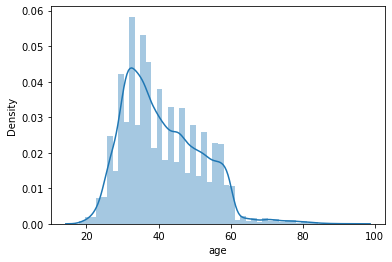

In [120]:
sns.distplot(data.age)
plt.show()

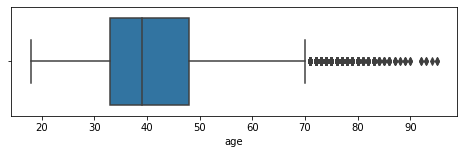

In [121]:
plt.figure(figsize=(8,2))
sns.boxplot(data.age)
plt.show()

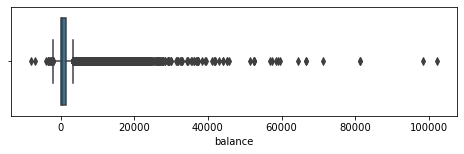

In [122]:
# Balance Variable

plt.figure(figsize=(8,2))
sns.boxplot(data.balance)
plt.show()

In [123]:
data.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

We can see about 95% of the data is having approx 5700 balance and there is outlier at 99%.

# Standardize Variable

In [124]:
# duration Varibale

data.duration.sample(10)

15521    4.61666666666667 min
11664                 177 sec
21932                2.85 min
17509    1.46666666666667 min
11902                  81 sec
17668    3.53333333333333 min
15869                0.35 min
26330    12.5833333333333 min
29723    1.36666666666667 min
35762    12.7166666666667 min
Name: duration, dtype: object

Column contain both min and sec value.

In [125]:
data.duration = data.duration.apply(lambda x : float(x.split(" ")[0])/60 if x.find("sec")>0 else float(x.split(" ")[0]))
data.duration.head()

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [126]:
# spliting JOBEDU into JOB and EDU

data["job"] = data.jobedu.apply(lambda x : x.split(",")[0])
data["education"] = data.jobedu.apply(lambda x : x.split(",")[1])

# drop jobedu column

data.drop("jobedu", axis=1,inplace=True)
data.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary


In [128]:
# extract the vaulue of month from column month.

data.month = data.month.apply(lambda x : x.split(",")[0])
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.300000,1,NaN,0,unknown,no,unknown,unknown


# Univariate Analysis - Categorical Features

#### Marital

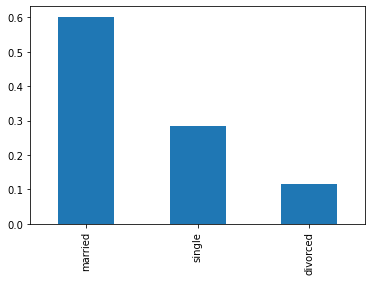

In [135]:
data.marital.value_counts(normalize=True).plot.bar()
plt.show()

#### Job

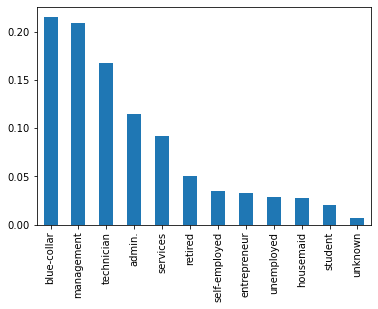

In [137]:
data.job.value_counts(normalize=True).plot.bar()
plt.show()

#### Education 

In [139]:
data.education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

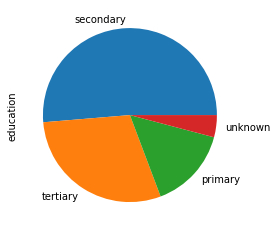

In [140]:
data.education.value_counts(normalize=True).plot.pie()
plt.show()

#### Poutcome

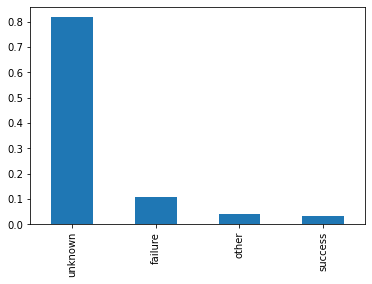

In [143]:
data.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

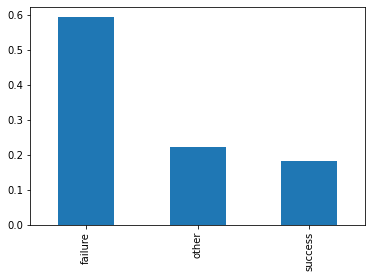

In [144]:
data[~(data.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response Variable

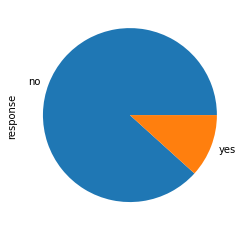

In [147]:
data.response.value_counts(normalize=True).plot.pie()
plt.show()

# Bi-Variate

#### Numerical - Numerical

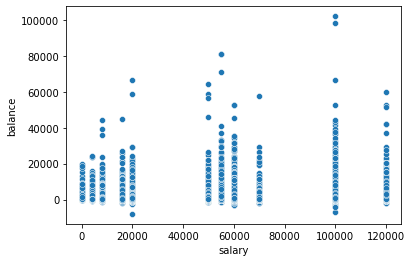

In [149]:
# Salary Vs Balance

sns.scatterplot(data.salary, data.balance)
plt.show()

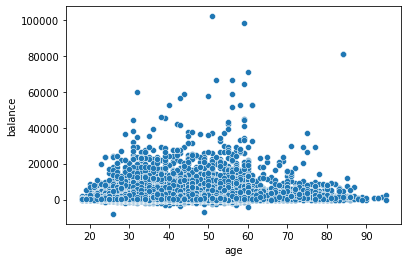

In [150]:
# Balance VS Age

sns.scatterplot(data.age, data.balance)
plt.show()

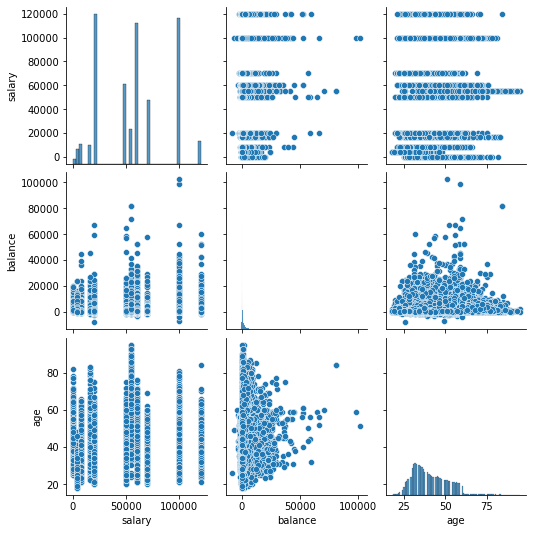

In [152]:
sns.pairplot(data, vars=["salary","balance","age"])
plt.show()

In [154]:
# Using Correlation

data[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


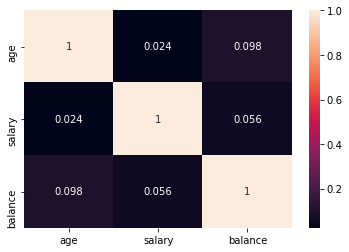

In [156]:
# Correlation Heatmap

sns.heatmap(data[["age","salary","balance"]].corr(), annot=True)
plt.show()

#### Categorical Vs Numerical

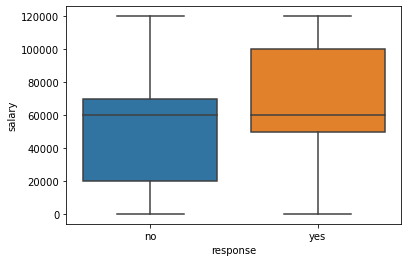

In [158]:
# Salary Vs Response

sns.boxplot(data.response, data.salary)
plt.show()

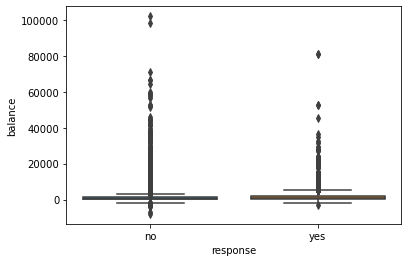

In [160]:
# Response Vs Balance

sns.boxplot(data.response,data.balance)
plt.show()

In [163]:
data.groupby("response")["balance"].aggregate(["mean","median"])

,mean,median
response,,
no,1304.292281,417
yes,1804.681362,733


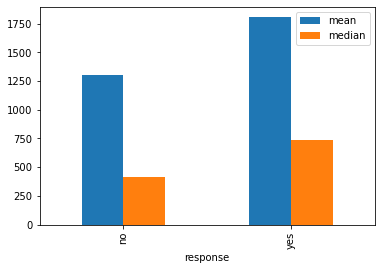

In [165]:
data.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar()
plt.show()

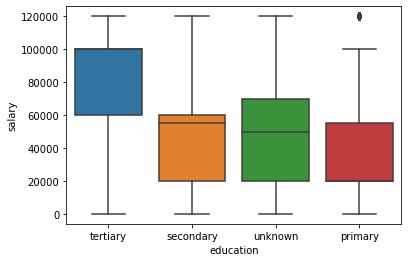

In [166]:
# Education Vs Salary

sns.boxplot(data.education, data.salary)
plt.show()

#### Categorical Vs Categorical

In [167]:
# Response VS Education

data["response_flag"] = np.where(data.response=="yes",1,0)
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.300000,1,NaN,0,unknown,no,unknown,unknown,0


In [168]:
data.groupby("education")["response_flag"].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

80% of the response where received from primary education.

In [169]:
# Marital Status VS Response Rate

data.groupby("marital")["response_flag"].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

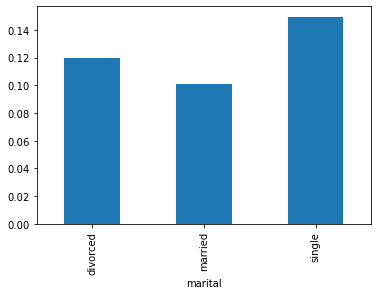

In [171]:
data.groupby("marital")["response_flag"].mean().plot.bar()
plt.show()

In [173]:
# Loan VS Response Rate

data.groupby("loan")["response_flag"].mean()

loan
no     0.126489
yes    0.066897
Name: response_flag, dtype: float64

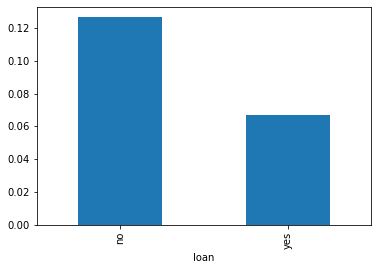

In [174]:
data.groupby("loan")["response_flag"].mean().plot.bar()
plt.show()

In [175]:
# Housing VS Response

data.groupby("housing")["response_flag"].mean()

housing
no     0.166982
yes    0.076960
Name: response_flag, dtype: float64

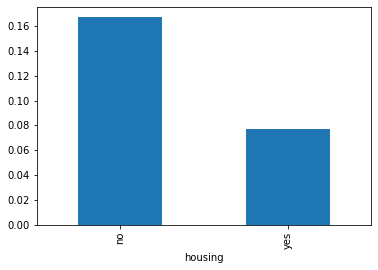

In [176]:
data.groupby("housing")["response_flag"].mean().plot.bar()
plt.show()

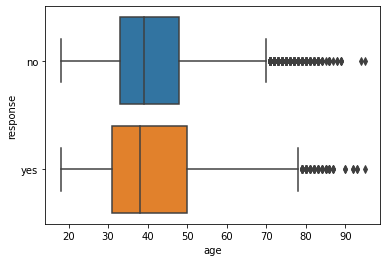

In [177]:
# Age Vs Response

sns.boxplot(data.age, data.response)
plt.show()

In [180]:
# Making Brackets for Age Column

data["age_group"] = pd.cut(data.age, [0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40


In [181]:
data.age_group.value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_group, dtype: float64

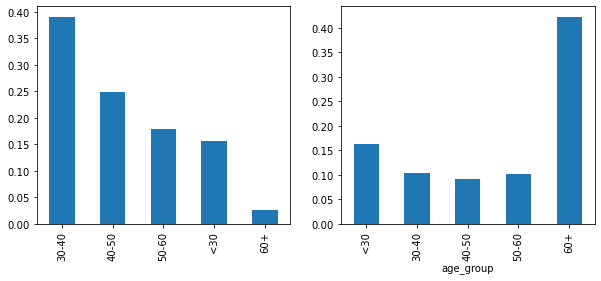

In [182]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
data.age_group.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
data.groupby("age_group")["response_flag"].mean().plot.bar()

plt.show()

Here we can see the count of 60+ people is very less; however, we have received the maximim response form this age group only.

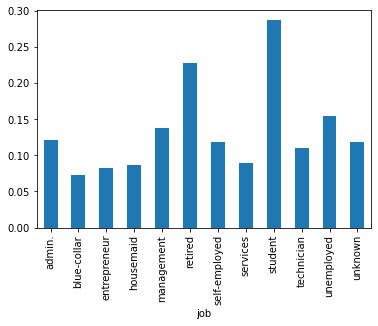

In [185]:
# JOB VS Response

data.groupby("job")["response_flag"].mean().plot.bar()
plt.show()

Most of the response is received from Students.

# Multivariate Analysis

In [187]:
# Education VS Marital VS Response

res = pd.pivot_table(data=data, index="education", columns="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


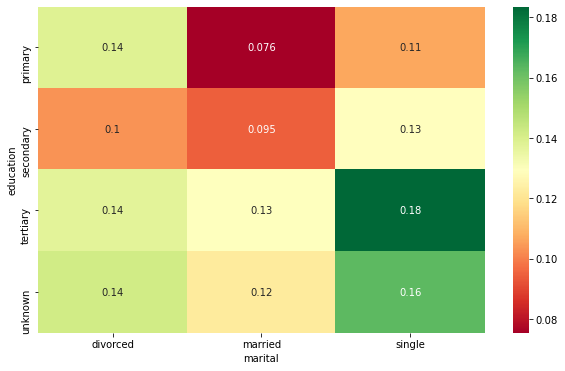

In [192]:
plt.figure(figsize=(10,6))
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()

In [193]:
# Job VS Marital VS Response

res = pd.pivot_table(data=data, index="job", columns="marital", values="response_flag")
res

marital,divorced,married,single
job,,,
admin.,0.120000,0.113257,0.136074
blue-collar,0.077540,0.062742,0.105760
entrepreneur,0.083799,0.075843,0.113445
housemaid,0.097826,0.072448,0.166667
management,0.127928,0.126134,0.162254
retired,0.283019,0.220682,0.120370
self-employed,0.158273,0.079557,0.190583
services,0.091241,0.073982,0.117696
student,0.166667,0.185185,0.293850


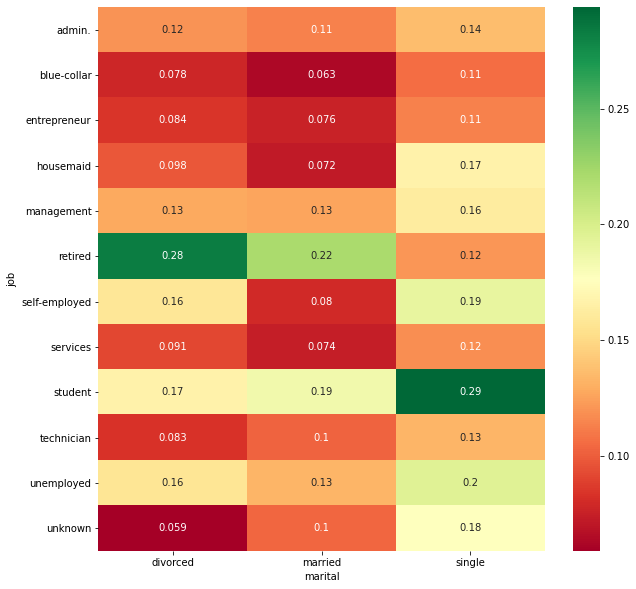

In [195]:
plt.figure(figsize=(10,10))
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()

In [196]:
# Edcation VS poutcome VS response

res = pd.pivot_table(data=data, index="education", columns="poutcome", values="response_flag")
res

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071735
secondary,0.108922,0.140831,0.640950,0.084200
tertiary,0.168456,0.220588,0.657005,0.114192
unknown,0.158192,0.200000,0.679012,0.101695


In [198]:
data[data.pdays>0].response_flag.mean()

0.23061076102762967

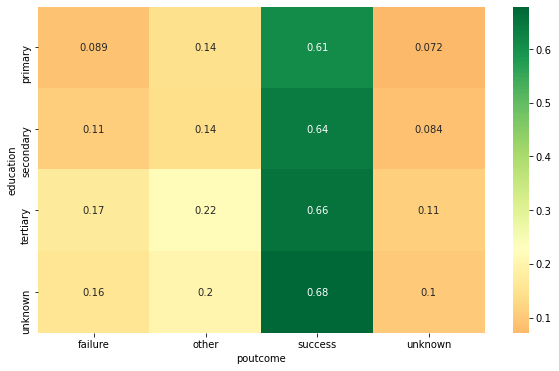

In [199]:
plt.figure(figsize=(10,6))
sns.heatmap(res, annot=True, cmap="RdYlGn", center=0.23)
plt.show()

# END